In [1]:
import pandas as pd
import numpy as np
dataset=pd.read_csv("./data.csv")
dataset.head

<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

In [2]:
print(dataset.keys())
X=dataset.iloc[:,2:].values

y=dataset["diagnosis"].values

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [3]:
y

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

# PCA implementation

In [4]:
class PCA():
    # self.n_components=n_components
    def __init__(self,n_components):
        self.n_components=n_components;
        self.components=[];
    def fit(self,X):
        means=np.mean(X,axis=0)
        X=X-means
        Cov_mat=np.cov(X.T)
        # print((Cov_mat))
        eigenvalues,eigenvectors=np.linalg.eig(Cov_mat)
        idxs=np.argsort(eigenvalues)[::-1]
        # print(idxs,eigenvalues)
        eigenvalues=eigenvalues[idxs]
        eigenvectors=eigenvectors[idxs]
        # print(eigenvalues)
        n=15
        self.components=eigenvectors[0:self.n_components]

    def transform(self,X):
        X_projected=np.dot(X,self.components.T)
        return X_projected;



(569, 6)


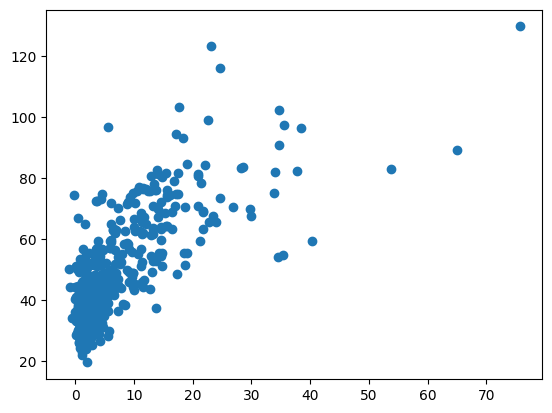

In [5]:
import matplotlib.pyplot as plt
pca=PCA(n_components=6)
pca.fit(X)
X_projected=pca.transform(X)
print(X_projected.shape)
X_projected_tr=X_projected.T
plt.scatter(X_projected_tr[0],X_projected_tr[3])

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train_pca,X_test_pca,y_train,y_test=train_test_split(X_projected,y,test_size=0.2,stratify=y)
model=LogisticRegression(max_iter=1000)
model.fit(X_train_pca,y_train)
trscore=model.score(X_train_pca,y_train)
tsscore=model.score(X_test_pca,y_test)
print(trscore,tsscore)

0.9494505494505494 0.9210526315789473


In [7]:
model_components=[30,28,25,22,20,18,15,13,10,8,5,3,2,1]
train_scores=[]
test_scores=[]

for i in range(0,len(model_components)):
    pca=PCA(n_components=1)
    pca.fit(X)
    X_projected=pca.transform(X)
    X_train_pca,X_test_pca,y_train,y_test=train_test_split(X_projected,y,test_size=0.2,stratify=y)
    model=LogisticRegression(max_iter=2000)
    model.fit(X_train_pca,y_train)
    trscore=model.score(X_train_pca,y_train)
    tsscore=model.score(X_test_pca,y_test)
    train_scores.append(trscore)
    test_scores.append(tsscore)


In [8]:
train_scores

[0.9164835164835164,
 0.9164835164835164,
 0.9208791208791208,
 0.9186813186813186,
 0.9208791208791208,
 0.9186813186813186,
 0.9120879120879121,
 0.9120879120879121,
 0.9142857142857143,
 0.9032967032967033,
 0.9098901098901099,
 0.9010989010989011,
 0.9186813186813186,
 0.9120879120879121]

In [9]:
test_scores

[0.9122807017543859,
 0.9122807017543859,
 0.8947368421052632,
 0.9035087719298246,
 0.8947368421052632,
 0.9035087719298246,
 0.9122807017543859,
 0.9298245614035088,
 0.9210526315789473,
 0.9649122807017544,
 0.9385964912280702,
 0.9736842105263158,
 0.9122807017543859,
 0.9122807017543859]

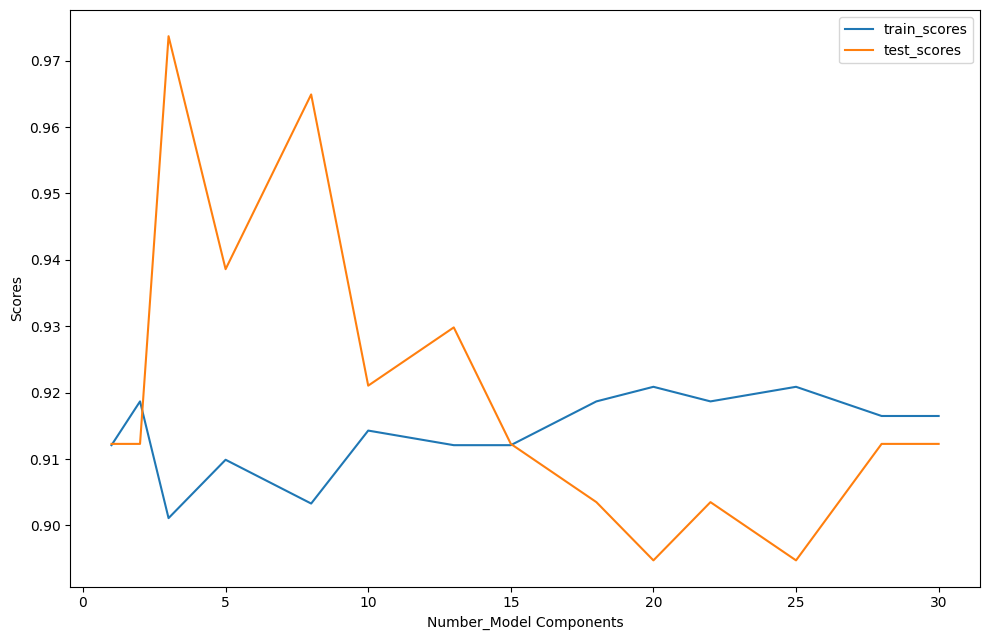

In [10]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [10.00, 6.50]
plt.rcParams["figure.autolayout"] = True




plt.plot(model_components, train_scores,label="train_scores")
plt.plot(model_components,test_scores,label="test_scores")
plt.xlabel('Number_Model Components')
plt.ylabel('Scores')

# Add a legend
plt.legend()

plt.show()

# K-Means implementation

In [11]:
import numpy as np
class Kmeans():
    def __init__(self,k=2):
        self.k=k
        self.centroids=None

    def eculidean_dist(data_point,centroid):
        return np.sqrt(np.sum((centroid-data_point)**2, axis=1))
    def fit(self,X,max_iter=100):
        self.centroids=np.random.uniform(np.amin(X,axis=0),np.max(X,axis=0),size=(self.k,X.shape[1]))
        for i in range (max_iter):
            y=[]

            for data_point in X:
                distances=Kmeans.eculidean_dist(data_point,self.centroids)
                cluster_num=np.argmin(distances)
                y.append(cluster_num)
                pass
            y=np.array(y)
            cluster_indices=[]
            for i in range(self.k):
                cluster_indices.append(np.argwhere(y==i))

            cluster_centers=[]
            for i,indices in enumerate(cluster_indices):
                if(len(indices)==0):
                    cluster_centers.append(self.centroids[i])
                else:
                    cluster_centers.append(np.mean(X[indices],axis=0)[0])

            if np.max(self.centroids-np.array(cluster_centers))<0.0001:
                break
            else:
                self.centroids=np.array(cluster_centers)
        return y


km=Kmeans(k=15)
labels=km.fit(X)

# Elbow method implementation and trial

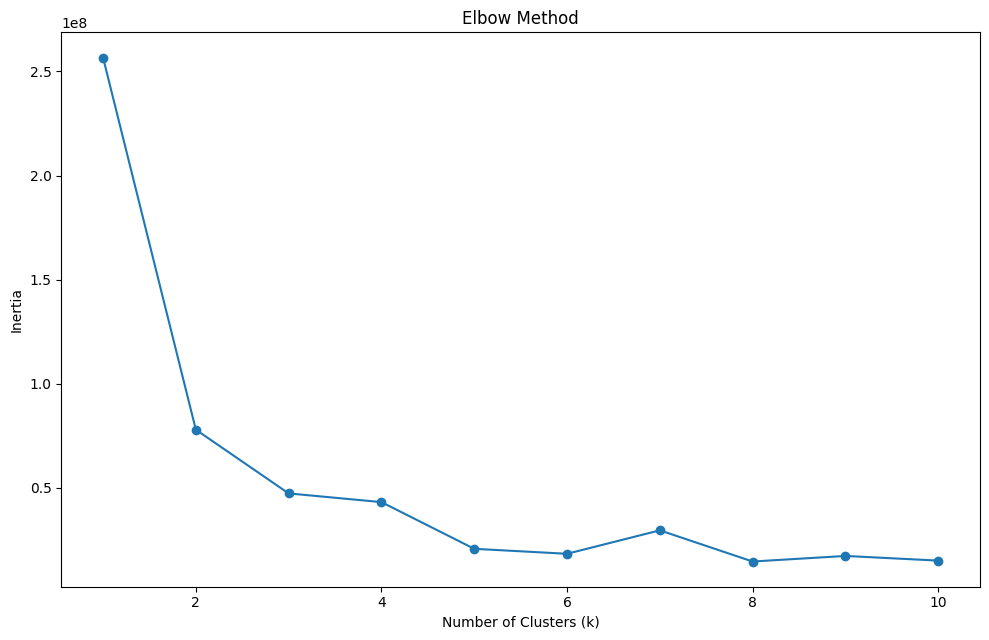

In [23]:
def calculate_inertia(X, k):
    kmean = Kmeans(k=k)
    labels = kmean.fit(X)
    centroids = kmean.centroids
    inertia = 0
    for i in range(k):
        cluster_points = X[labels == i]
        inertia += np.sum((cluster_points - centroids[i])**2)
    return inertia

# Elbow method to find the optimal number of clusters
def elbow_method(X, max_clusters=10):
    inertias = []
    for k in range(1, max_clusters + 1):
        inertia = calculate_inertia(X, k)
        inertias.append(inertia)

    # Plotting the elbow curve
    plt.plot(range(1, max_clusters + 1), inertias, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.show()

# Apply elbow method to your data
elbow_method(X, max_clusters=10)

(569, 2)


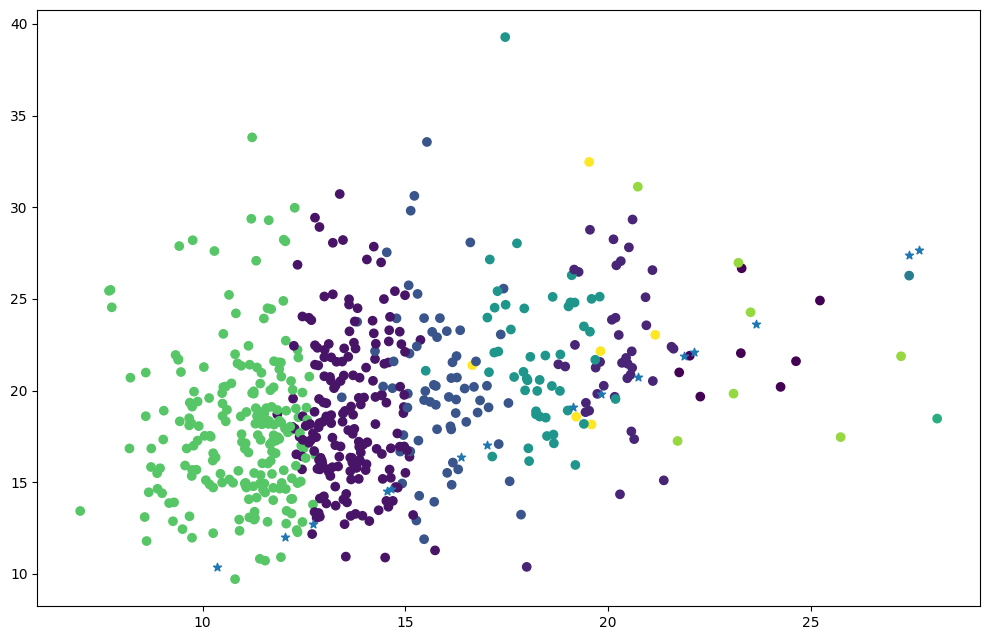

In [30]:
pca=PCA(n_components=2)
pca.fit(X)
X_projected=pca.transform(X)
print(X_projected.shape)
km2=Kmeans(k=20)
labels=km2.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(km.centroids[:,0],km.centroids[:,0],marker="*")

plt.show()


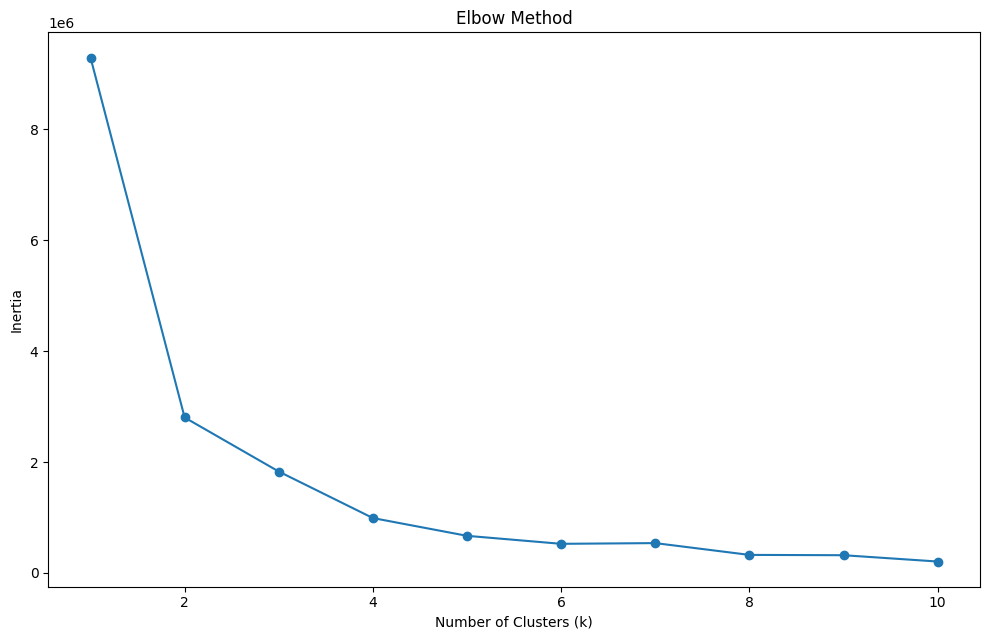

In [25]:
elbow_method(X_projected, max_clusters=10)

(569, 1)


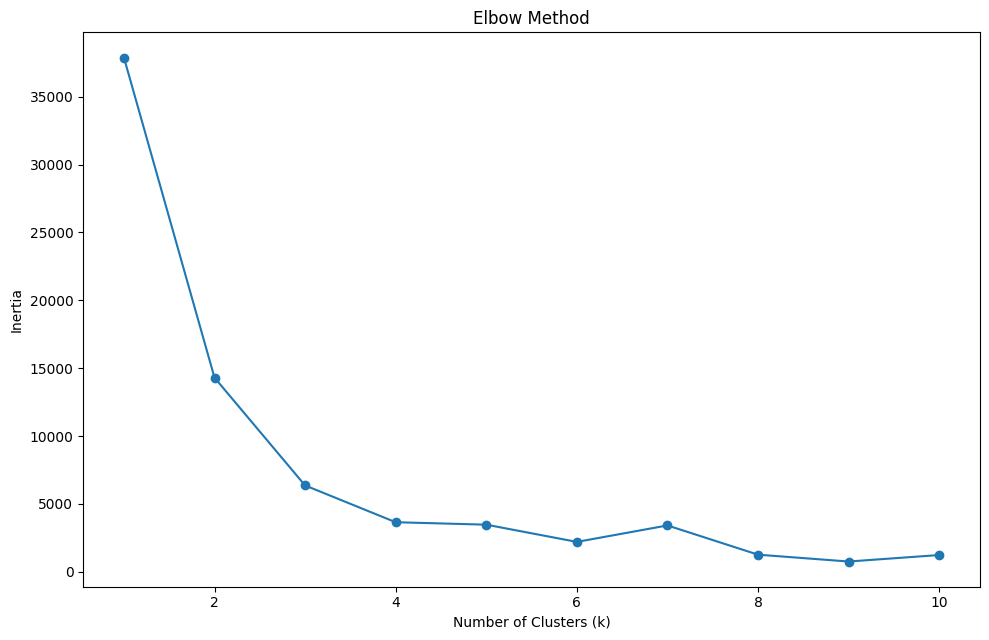

(569, 2)


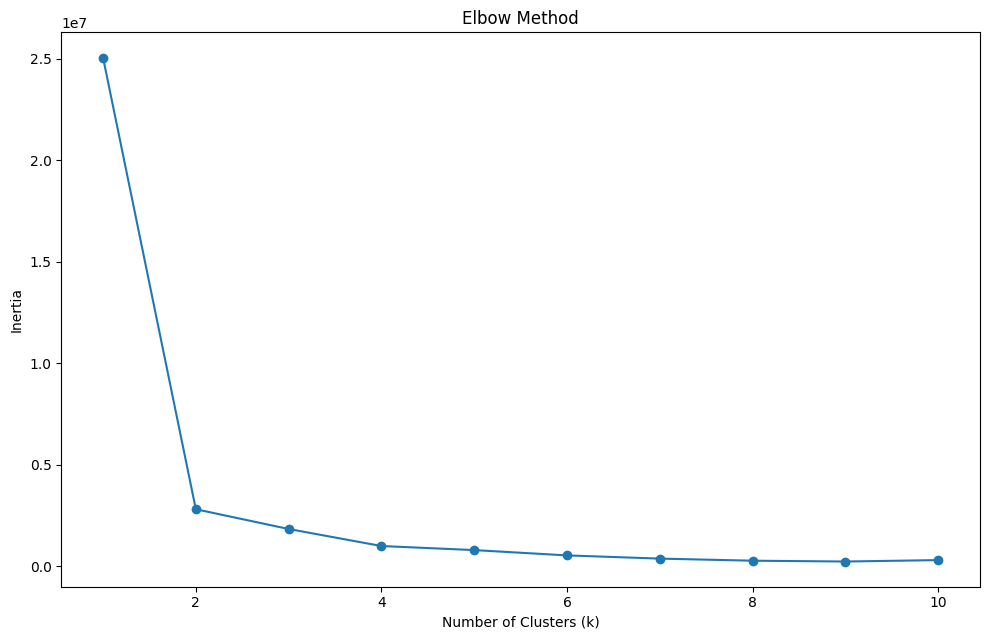

(569, 3)


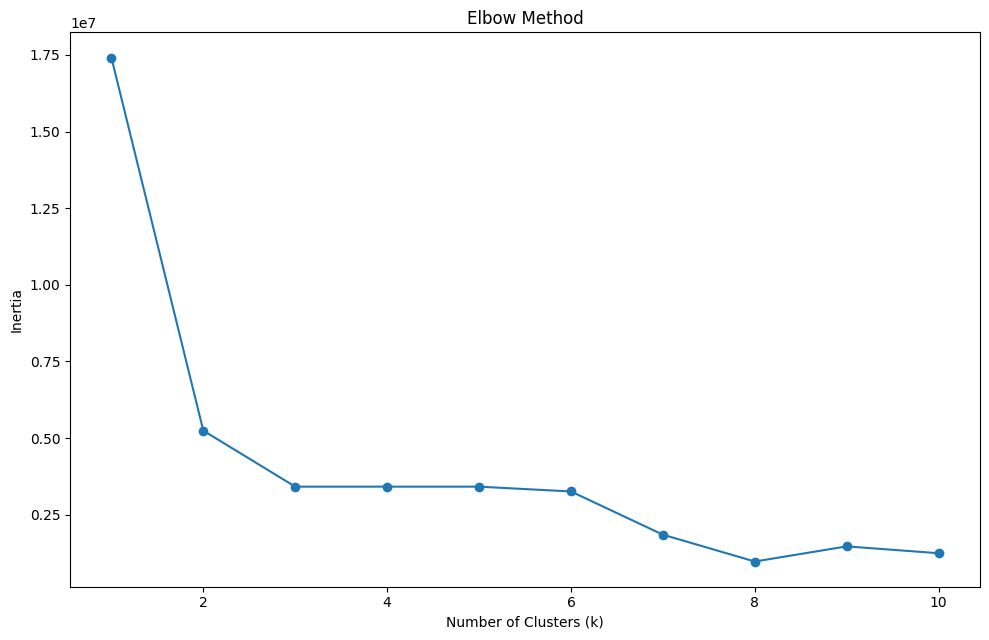

(569, 5)


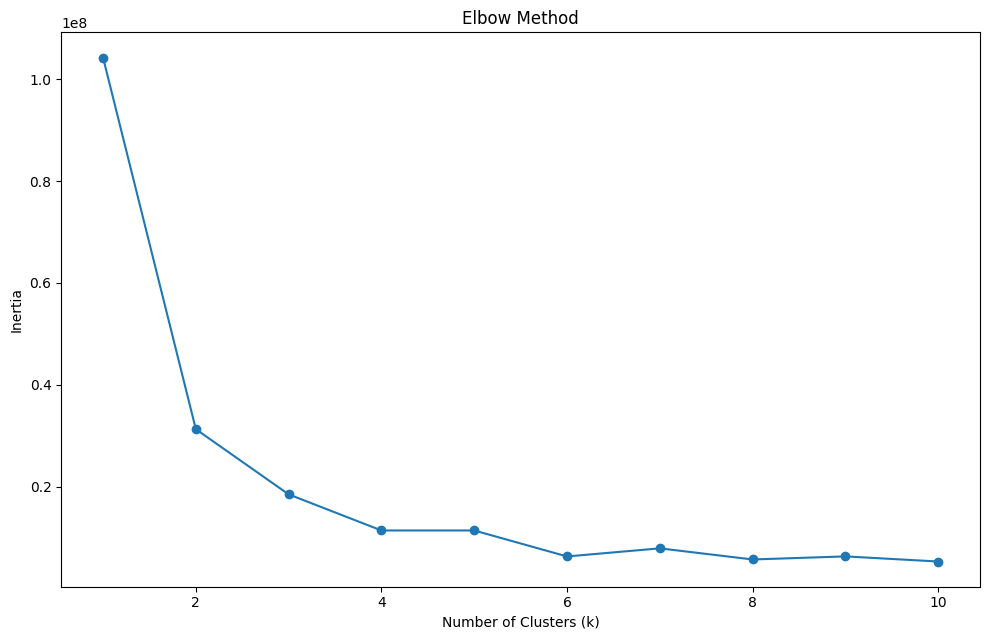

(569, 8)


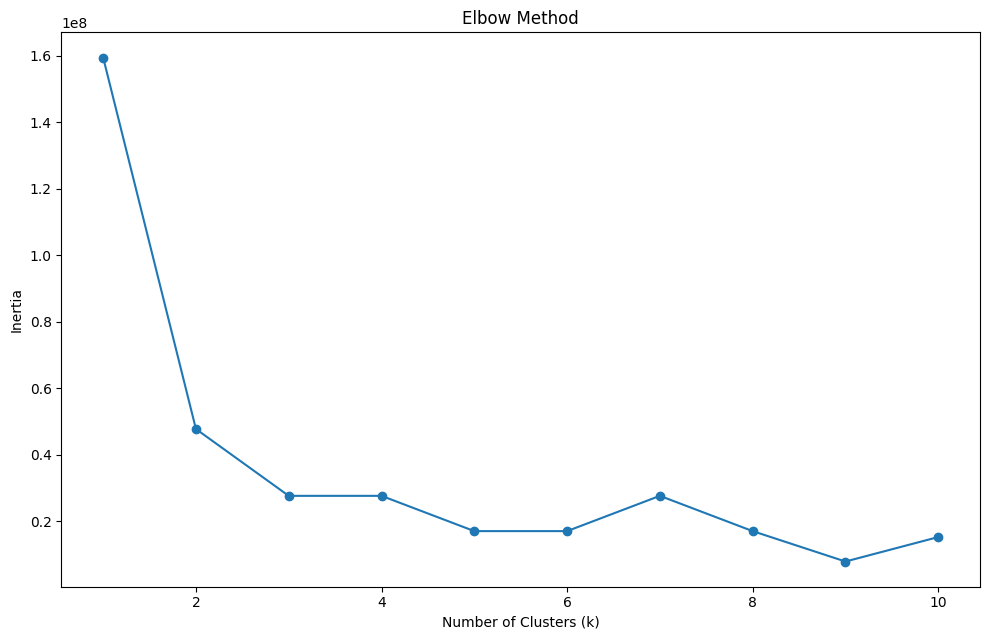

(569, 12)


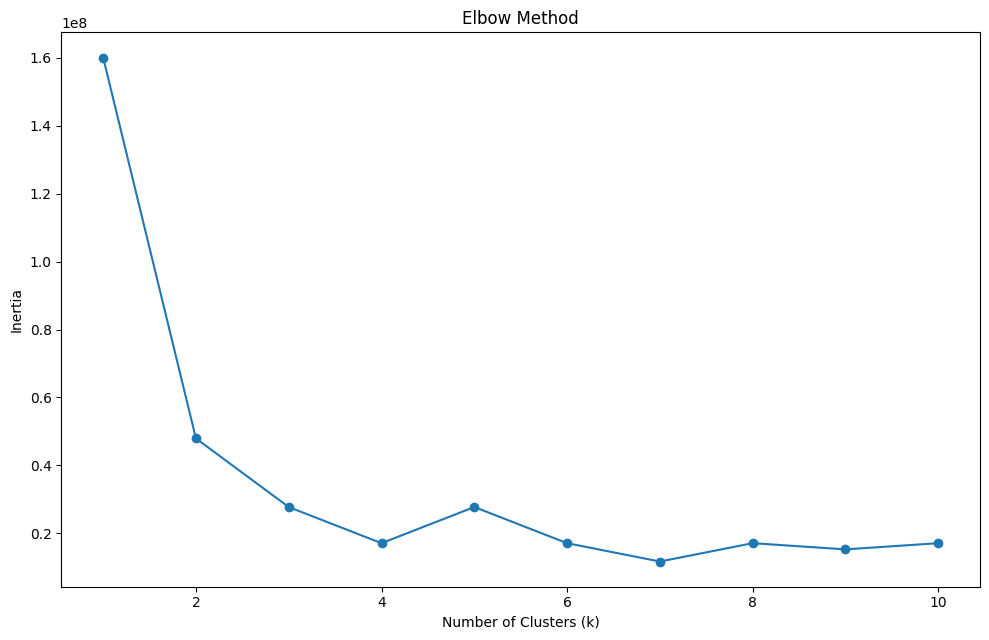

(569, 15)


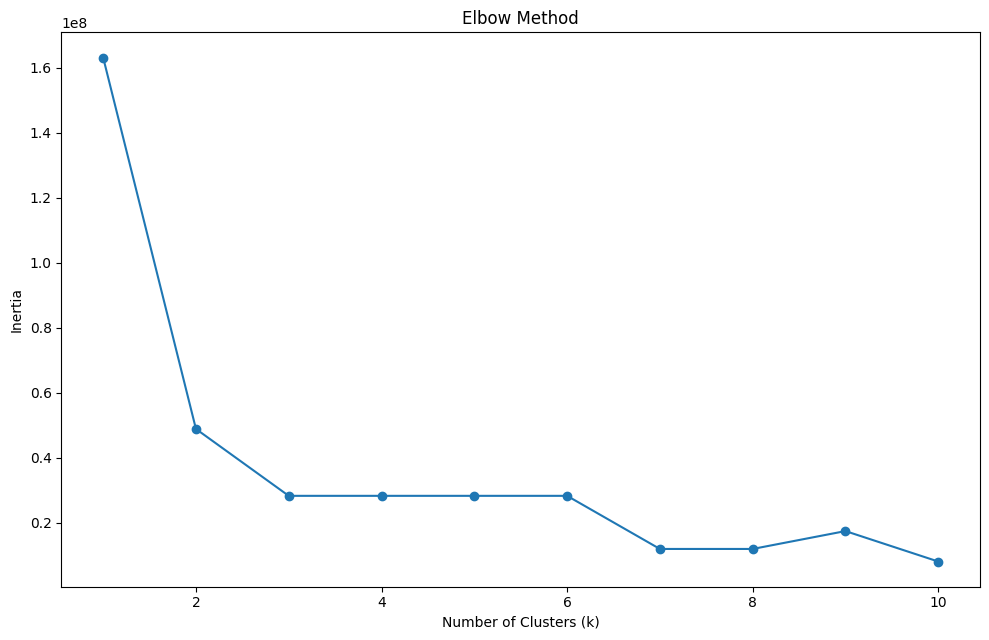

(569, 20)


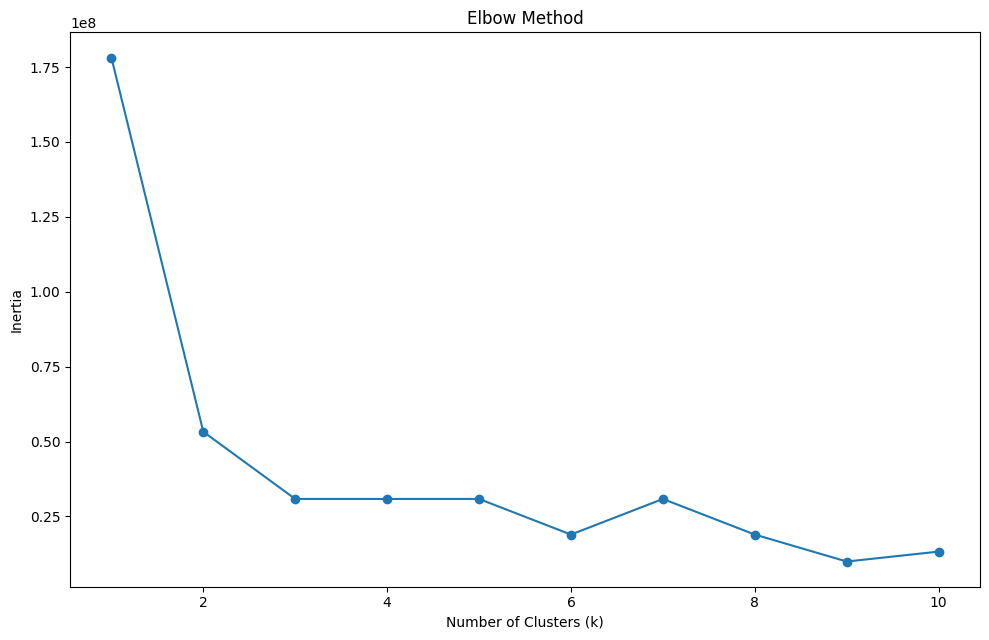

(569, 24)


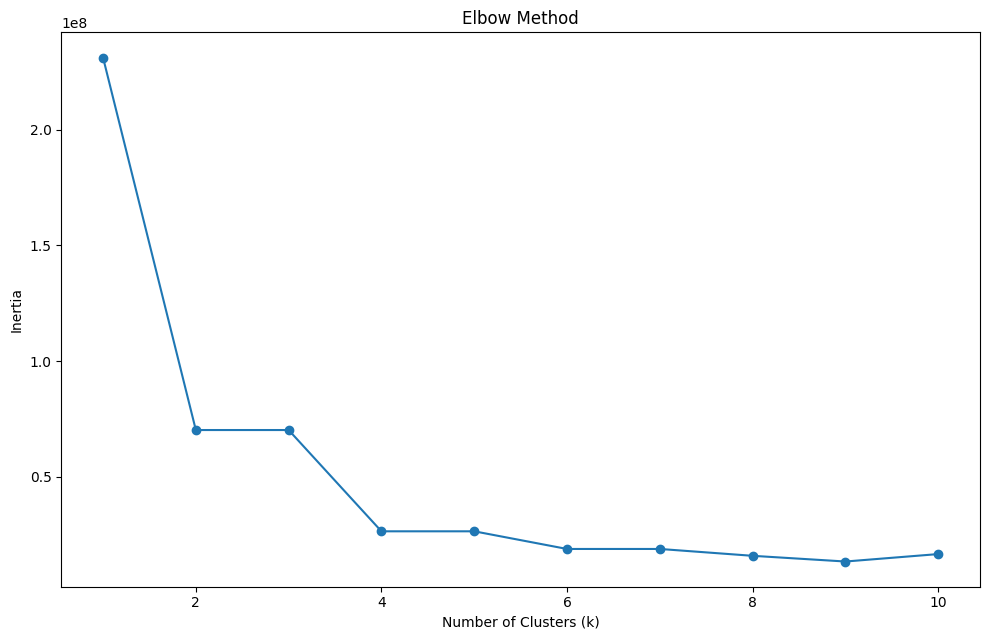

(569, 28)


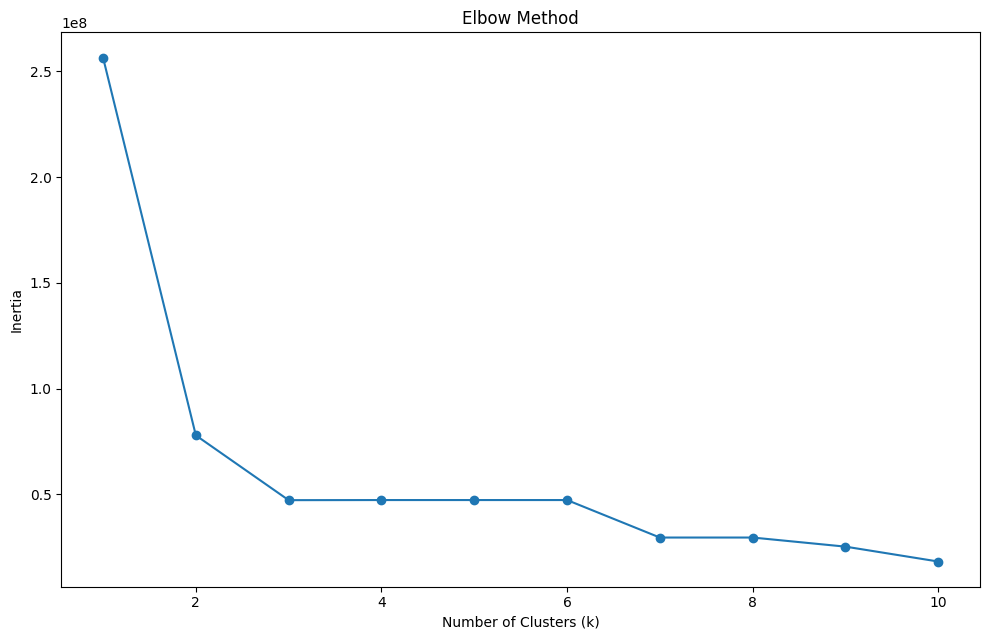

In [27]:
components_num=[1,2,3,5,8,12,15,20,24,28]
for i in range(0,len(components_num)):
    pca=PCA(n_components=components_num[i])
    pca.fit(X)
    X_projected=pca.transform(X)
    print(X_projected.shape)
    elbow_method(X_projected, max_clusters=10)

## Trying 10 different no of PCA components, then using them in K-means, then applying elbow method

(569, 1)
(569, 2)
(569, 3)
(569, 5)
(569, 8)
(569, 12)
(569, 15)
(569, 20)
(569, 24)
(569, 28)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


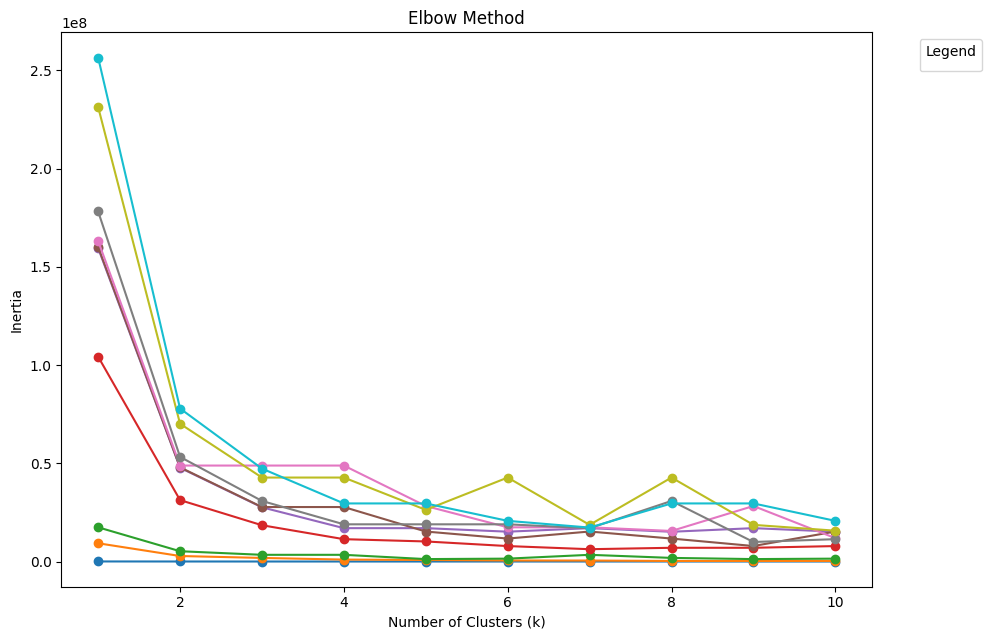

In [22]:
components_num=[1,2,3,5,8,12,15,20,24,28]
for i in range(0,len(components_num)):
    pca=PCA(n_components=components_num[i])
    pca.fit(X)
    X_projected=pca.transform(X)
    print(X_projected.shape)
    km2=Kmeans(k=10)
    labels=km2.fit(X)
    elbow_method(X_projected, max_clusters=10)
plt.legend()
plt.show()

#### it's obvious that by increasing the n_components(no_of_dimensions) the SSE(inertia) increase obviously as the number of dimensions increse

# Visualizing the results and comparing it with the original labels

In [41]:
km_best=Kmeans(k=3)
labels=km_best.fit(X)


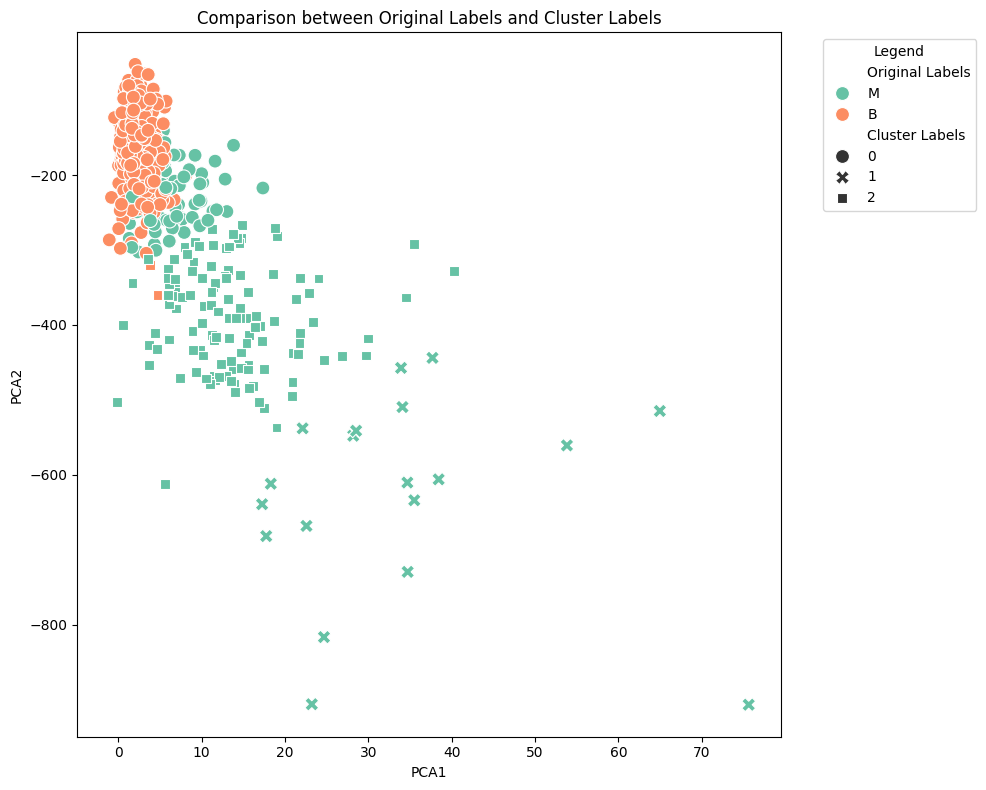

In [43]:
import seaborn as sns
# Apply PCA to reduce data to 2D
pca = PCA(n_components=2)
pca.fit(X)
X_pca =pca.transform(X)
# Convert PCA results to a DataFrame for plotting
pca_df = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'Original Labels': y,
    'Cluster Labels': labels # Assuming 'labels' contains the cluster

})
# Plotting
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Original Labels',
style='Cluster Labels', data=pca_df, palette='Set2', s=100)
plt.title('Comparison between Original Labels and Cluster Labels')
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Notes

### It is noticed that most of the square, x clusters are originally of the M class, while the circle cluster is divided between both classes. It indicates that there might be some degree of class separation in the reduced feature space. The square and x clusters seem to have found patterns distinct for the M class which makes them insightful, the circle cluster however isn't as much telling.